In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys
import pandas as pd
from os import listdir
from os.path import isfile, join

In [2]:
beat_dyn = pd.read_csv('./csvs/M06-1beat_dynNORM.csv')
beat_time = pd.read_csv('./csvs/M06-1beat_time.csv')

In [3]:
pianist_mapping = pd.read_csv('./pianistID_name.csv')
mazurka_mapping = pd.read_csv('./mazurka-discography.csv', sep='\t')

In [4]:
pianist_dict = dict(pianist_mapping.to_dict('split')['data'])

In [5]:
mazurka_mapping

,opus,key,performer,year,time,seconds,label,pid,status
0,6.1,F# min,Ashkenazy,1981,3:14,194,Decca 448 086-2,9058-01,-
1,6.1,F# min,Bacha,1997,2:46,166,Forlane 126817,9166c-03,-
2,6.1,F# min,Barbosa,1983,2:30,150,Centaur CRC2098/9,9174-01,-
3,6.1,F# min,Biret,1990,3:29,209,Naxos 8.550359,9062-01,-
4,6.1,F# min,Blet,2003,3:31,211,Marcal MA030501,9103-01,-
...,...,...,...,...,...,...,...,...,...
2726,68.4,F min,Sofronitsky,1961,1:44,104,Classound 001-026,9113-14,-
2727,68.4,F min,Sztompka,1959,2:03,123,Muza PNOD 313 A/B,9170b-22,-
2728,68.4,F min,Uninsky,1959,2:01,121,Philips 442 574-2,9061b-17,-
2729,68.4,F min,Vardi,1988,3:26,206,Carriere Classics 21.0017,9173-23,-


In [6]:
def load_dir(path):
    files = os.listdir(path)
    return files

# piece is in form op-no
# ie: "06-1" for opus 6 no 1
def load_mazurka(piece):
    dyn_file = f'M{piece}beat_dynNORM.csv'
    beat_file = f'M{piece}beat_time.csv'
    beat_dyn = pd.read_csv(f'./csvs/beat_dyn/{dyn_file}')
    beat_time = pd.read_csv(f'./csvs/beat_time/{beat_file}')
    return (beat_dyn, beat_time)

In [7]:
beat_dyn, beat_time = load_mazurka('06-2')


In [8]:
# Mazurka is response from load_mazurka(beat_dyn, beat_time)
def get_pianist_data(mazurka, pianist_name):
    pid = f'pid{pianist_dict[pianist_name]}'
    dyn, time = mazurka
    piece_pids = list(dyn)
    for i in range(len(piece_pids)):
        piece_pid = piece_pids[i]
        if piece_pid.startswith(pid):
            piece_time, dyn_time = time[piece_pid], dyn[piece_pid]
            
            avg_dyn = np.array(dyn_time).mean()
            print(pid)
            num_beats = len(piece_time)
            piece_length = np.array(piece_time)[num_beats - 1] / 60
            tempo = num_beats // piece_length
            
            return (tempo, avg_dyn)
    print("No performer found!")
    return None

In [9]:
m06_2 = load_mazurka('06-2')
vardi_dyn = get_pianist_data(m06_2, "Vardi")

pid9173


In [10]:
vardi_dyn

(111.0, 0.4701404027187501)

In [11]:
def plot_performance(data):
    plt.ylabel('Volume(sones)')
    plt.xlabel('Tempo(bpm)')
    plt.plot(data[0], data[1], 'ro')

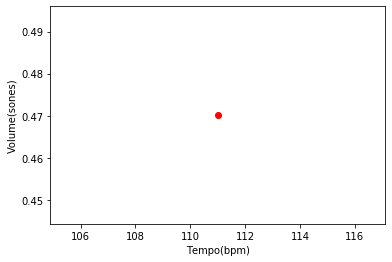

In [12]:
plot_performance(vardi_dyn)

In [159]:
biret_dyn = get_pianist_data(m06_2, "Cortot")

No performer found!


In [156]:
biret_dyn

(113.0, 0.5278965523958333)

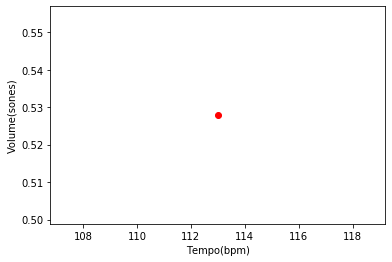

In [158]:
plot_performance(biret_dyn)

In [160]:
beat_time

,Unnamed: 0,measure_number,beat_number,pid1263-01,pid52932-01,pid9048-01,pid9050-01,pid9054-01,pid9055-01,pid9058-01,...,pid9137-01,pid9138-01,pid9139-01,pid9150-15,pid9153-01,pid9166c-03,pid9173-06,pid9174-01,pid9186c-01,pid9192-01
0,0,1,2,4.435011,3.041814,3.877732,1.109002,3.181134,2.298027,3.552653,...,1.904036,0.589002,1.147007,1.149002,0.952018,0.786009,0.224014,0.269002,0.407007,0.529002
1,1,2,0,5.131610,3.970612,4.760091,1.648594,4.040272,3.268594,4.852971,...,2.623855,1.713129,1.928594,1.908594,1.728594,1.189944,1.188594,1.048594,0.789478,1.248594
2,2,2,1,5.893084,4.913084,5.553084,2.260771,4.513084,3.993084,5.673084,...,3.053084,2.433084,2.813084,2.533084,2.345215,1.573084,1.813084,1.633084,1.130771,2.153084
3,3,2,2,6.366145,5.446145,6.066145,2.586145,4.906145,4.406145,6.339048,...,3.406145,2.846145,3.286145,2.966145,2.716735,2.006145,2.206145,2.046145,1.425125,2.546145
4,4,3,0,7.010227,6.110227,6.670227,3.150227,5.410227,4.890227,7.230227,...,3.784853,3.410227,3.790227,3.490227,3.170227,2.370227,2.670227,2.550227,1.830227,3.170227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,112,1,187.953900,176.553900,192.533900,172.453900,154.973900,179.353900,185.433900,...,125.333900,162.813900,189.851950,151.093900,153.053900,160.273900,188.253900,142.573900,126.693900,189.293900
333,333,112,2,188.894310,177.874310,193.254310,173.414310,156.214310,180.204770,186.294310,...,125.991470,164.074310,190.714310,151.614310,154.292150,161.086080,189.014310,143.152150,127.166080,190.112430
334,334,113,0,189.974970,179.649820,194.549820,174.569820,157.049820,181.609820,187.549820,...,126.869820,165.849820,191.803270,152.489820,155.709820,161.989820,190.289820,143.969820,128.133310,191.049820
335,335,113,1,190.924920,180.904920,195.504920,176.084920,158.184920,183.004920,189.144920,...,127.407890,167.324920,192.684920,153.824920,156.728730,162.764920,191.724920,145.041640,129.248730,192.104920


In [162]:
test_timing = beat_time['pid1263-01']

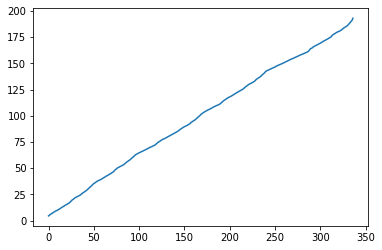

In [164]:
plt.plot(np.arange(len(test_timing)), test_timing)